In [3]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
#Load the Data

df = pd.read_csv("../data/raw/ecommerce_data.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [5]:
#Understanding the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [6]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [7]:
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [8]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.828977
1    0.171023
Name: proportion, dtype: float64

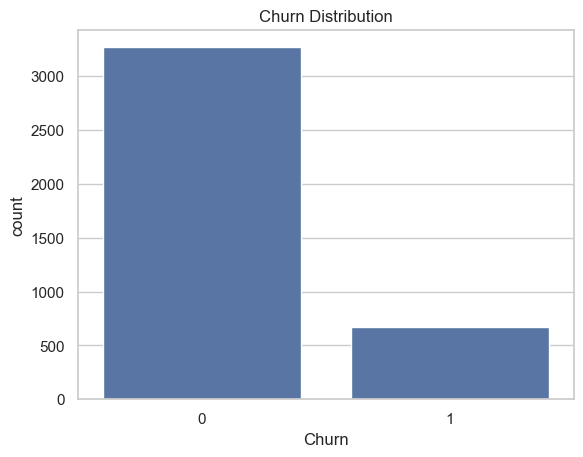

In [9]:
# Churn Class Distribution
%matplotlib inline
sns.set_theme(style='whitegrid')
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

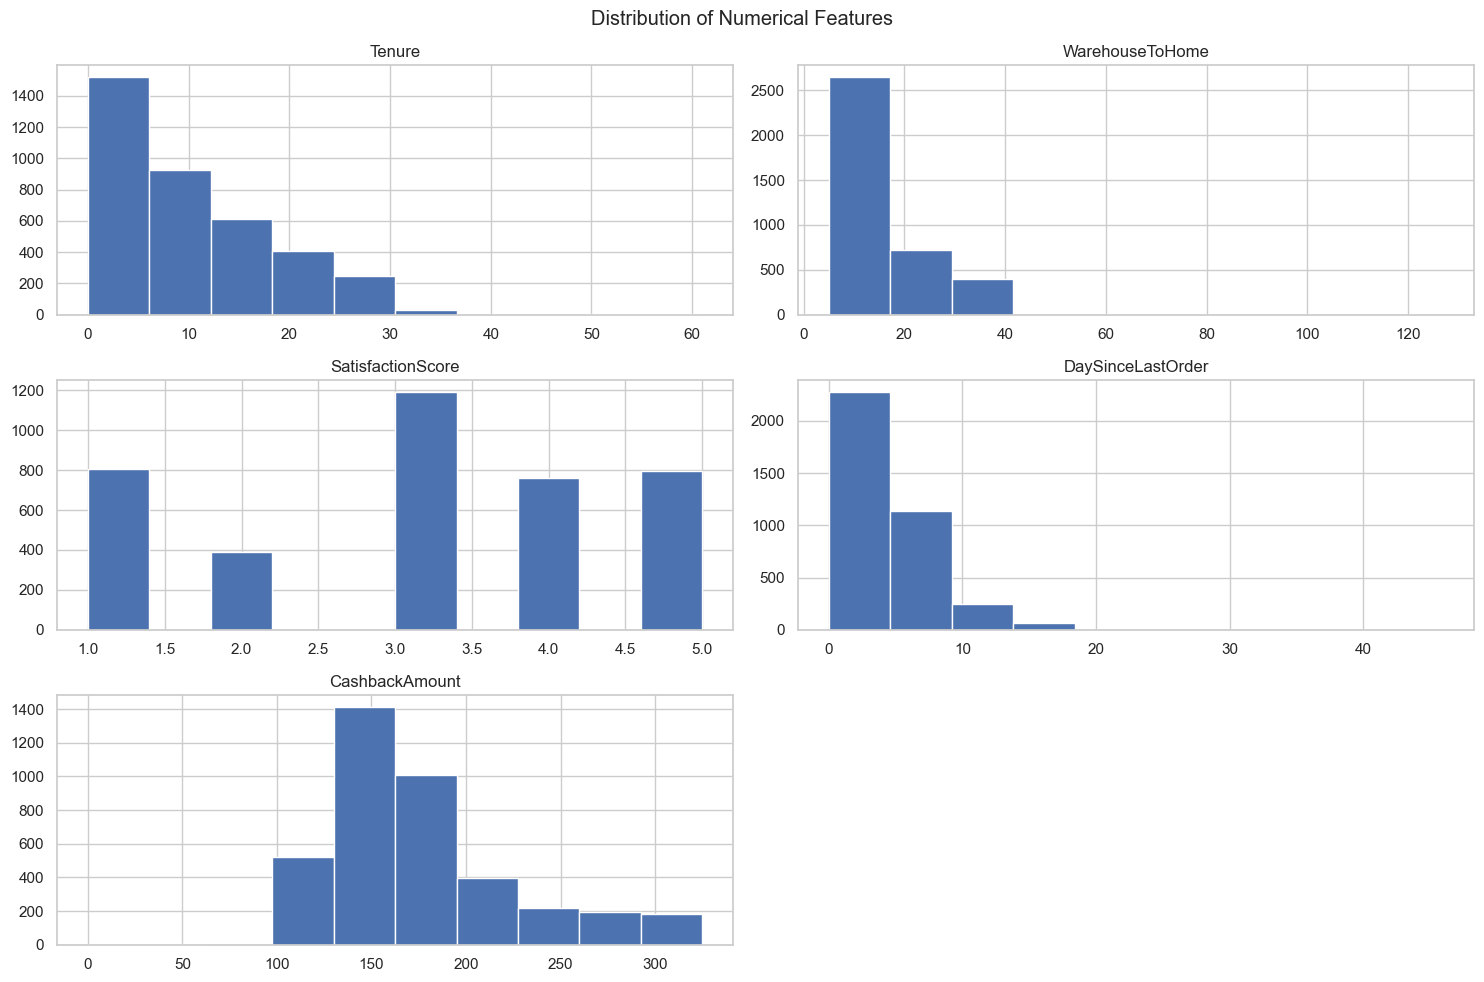

In [10]:
# Distribution of Numerical Features
num_cols = ['Tenure', 'WarehouseToHome','SatisfactionScore', 'DaySinceLastOrder', 'CashbackAmount']

df[num_cols].hist(bins=10,figsize=(15,10))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

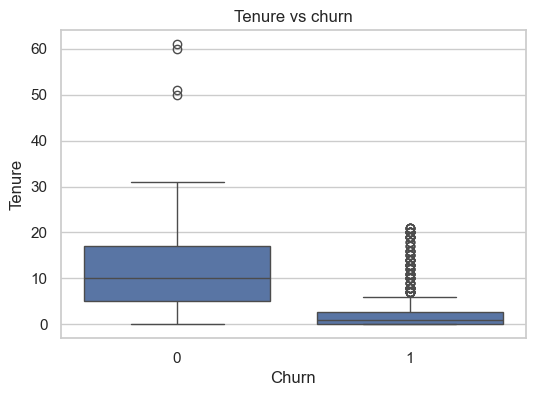

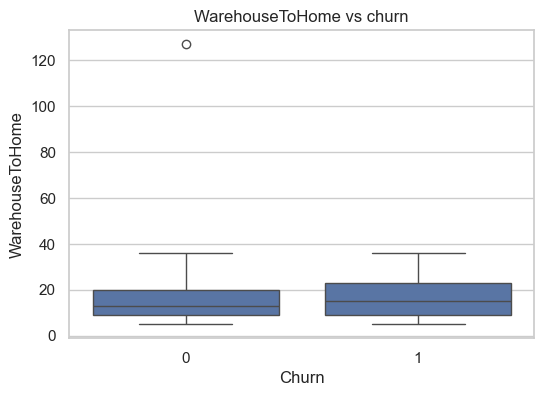

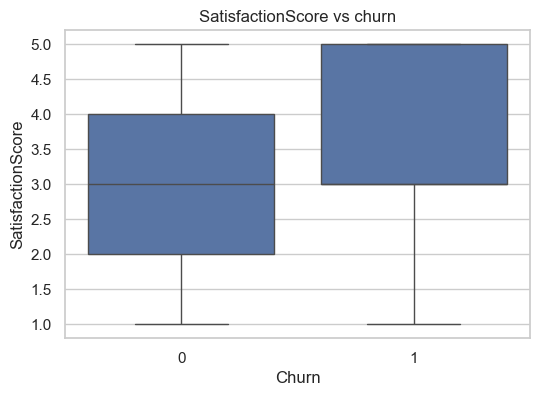

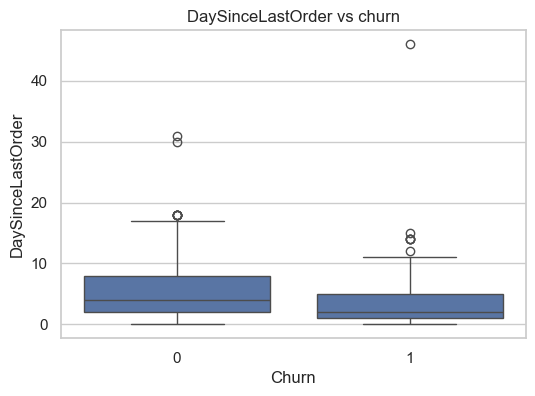

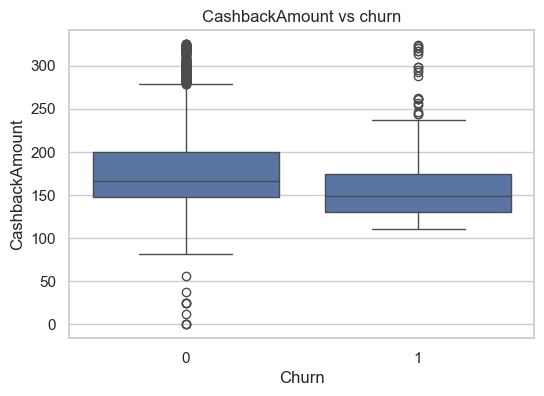

In [ ]:
#Feature Distribution with Churn
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn',y=col, data=df)
    plt.title(f"{col} vs churn")
    plt.show()

<Figure size 1000x600 with 0 Axes>

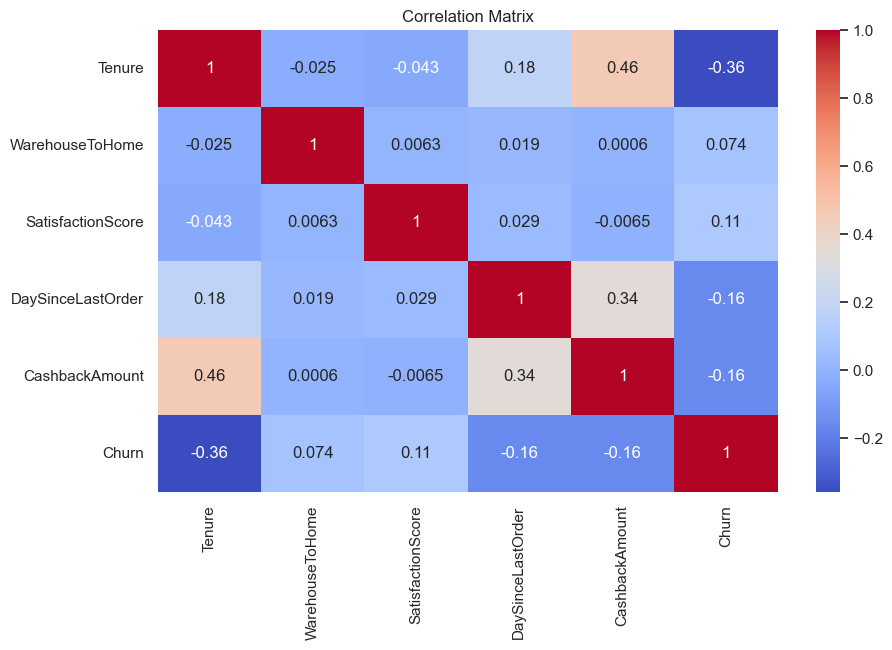

In [17]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols+["Churn"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

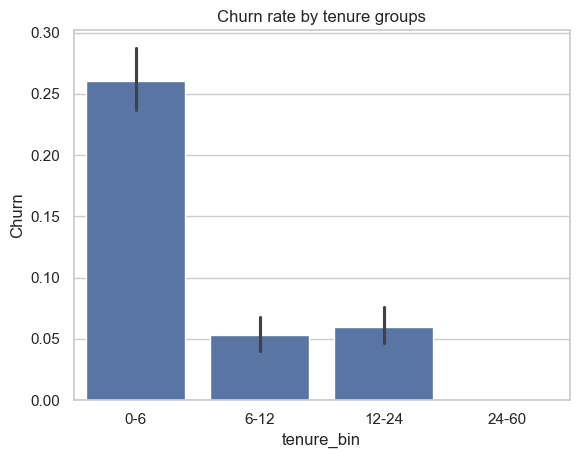

In [20]:
#Churn rate by tenure groups
df['tenure_bin'] = pd.cut(df['Tenure'], bins=[0, 6, 12, 24, 60], labels=['0-6','6-12','12-24','24-60'])
sns.barplot(x='tenure_bin',y='Churn',data=df)
plt.title('Churn rate by tenure groups')
plt.show()

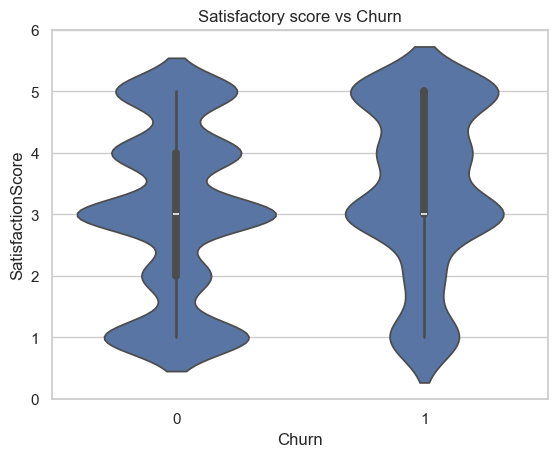

In [22]:
#Satisfactory score vs Churn
sns.violinplot(x='Churn',y='SatisfactionScore', data=df)
plt.title('Satisfactory score vs Churn')
plt.show()

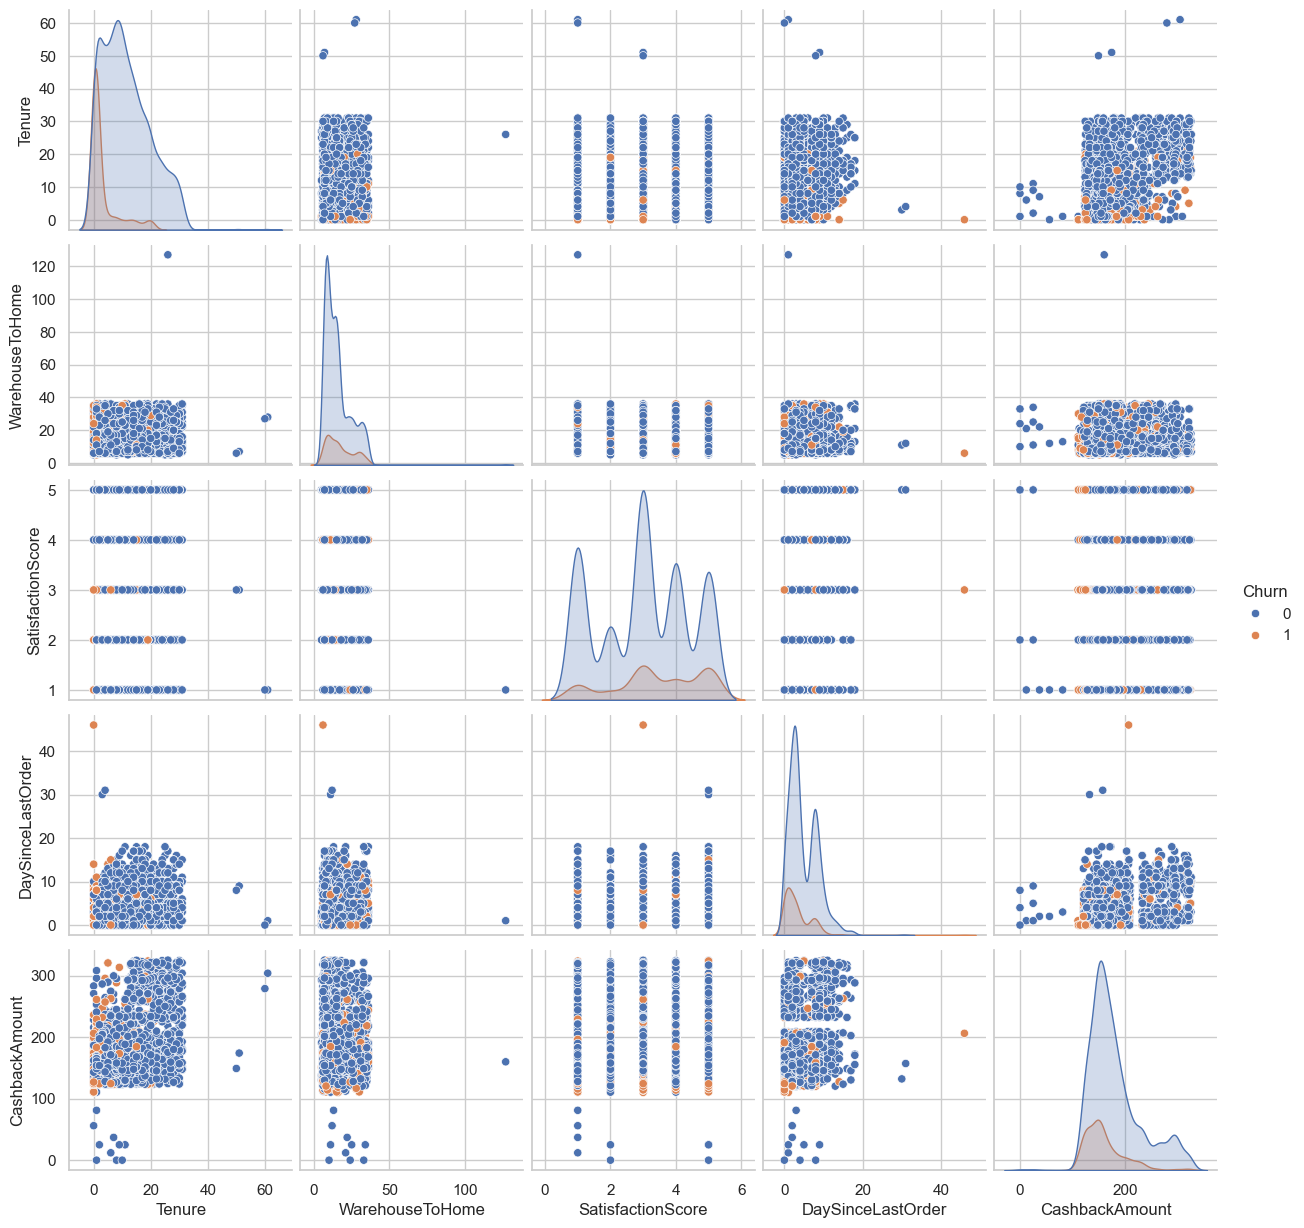

In [26]:
#Feature Relationship
sns.pairplot(df[num_cols+['Churn']], hue='Churn')
plt.show()

# EDA Summary

1. Dataset is imbalaced - only 17% of customer are churned , but this can be handled during modelling
2. Tenure shows negative relation with churn
3. The more time customers spend with the company the less likey they are to churn
4. Other feature do not show much individual pattern but models like RandomForest or XGBoost may capture useful interaction between them